<h1>Nearest Neighbor</h1>


<h2> NN - Training </h2>

Here we can compute a dataset of greedy trajectories, and save the latent encoding of each object along with it's best action. This is perfromed in the touch only poking setting. The parameter greedy_checks is set to 3 to increase spped of computation.

In [1]:
import os
from pterotactyl.reconstruction import touch 
from pterotactyl.reconstruction import vision 
from pterotactyl.policies.NearestNeighbor import train
from pterotactyl import pretrained

class Params: # define training arguments 
    def __init__(self):
        
        self.limit_data = True
        self.env_batch_size = 2
        self.num_actions = 50
        self.seed = 0 
        self.budget = 5
        self.number_points = 10000
        self.loss_coeff = 9000
        self.exp_type = "NN_example"
        self.finger = True 
        self.num_grasps = 5 
        self.use_touch = True 
        self.use_img = False
        self.visualize = True
        self.use_latent = True
        self.use_recon = False 
        self.eval = False 
        self.greedy_checks = 3
        self.pretrained_recon = True
        self.pretrained=False
        
    

params = Params()
trainer = train.Engine(params)
trainer()

pybullet build time: Sep 20 2021 20:33:29
/private/home/ejsmith/.conda/envs/cluster/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:529: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")
100%|█████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 2681.15it/s]


The number of RL_train set objects found : 122


100%|████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 32254.57it/s]


The number of valid set objects found : 34
argv[0]=
argv[0]=


100%|█████████████████████████████████████████████████████████████████████████████████| 61/61 [01:59<00:00,  1.95s/it]


<h2> NN - Evaluation </h2>

We now evaluate the trained model. We run with the visualize paramater set to true to view predicted objects. 

100%|█████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 4385.24it/s]


The number of test set objects found : 13
argv[0]=
argv[0]=


 17%|█████████████▊                                                                     | 1/6 [00:01<00:07,  1.52s/it]

Valid || score: 0.1647, reward = 0.8353


 33%|███████████████████████████▋                                                       | 2/6 [00:02<00:05,  1.39s/it]

Valid || score: 0.1972, reward = 0.8028


 50%|█████████████████████████████████████████▌                                         | 3/6 [00:04<00:04,  1.35s/it]

Valid || score: 0.3389, reward = 0.6611


 67%|███████████████████████████████████████████████████████▎                           | 4/6 [00:05<00:02,  1.34s/it]

Valid || score: 0.3292, reward = 0.6708


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [00:06<00:01,  1.33s/it]

Valid || score: 0.2115, reward = 0.7885


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [00:08<00:01,  1.33s/it]

Valid || score: 0.2467, reward = 0.7533
*******************************
rendering the predicted objects
*******************************


  0%|          | 0/12 [00:00<?, ?it/s]

argv[0]=
argv[0]=


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:11<00:00,  1.92s/it]


******************************
*********************************************
Total Valid || score: 0.2480, reward = 0.7520
*********************************************


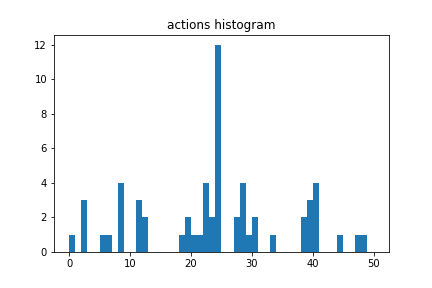




   Projected Actions


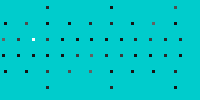

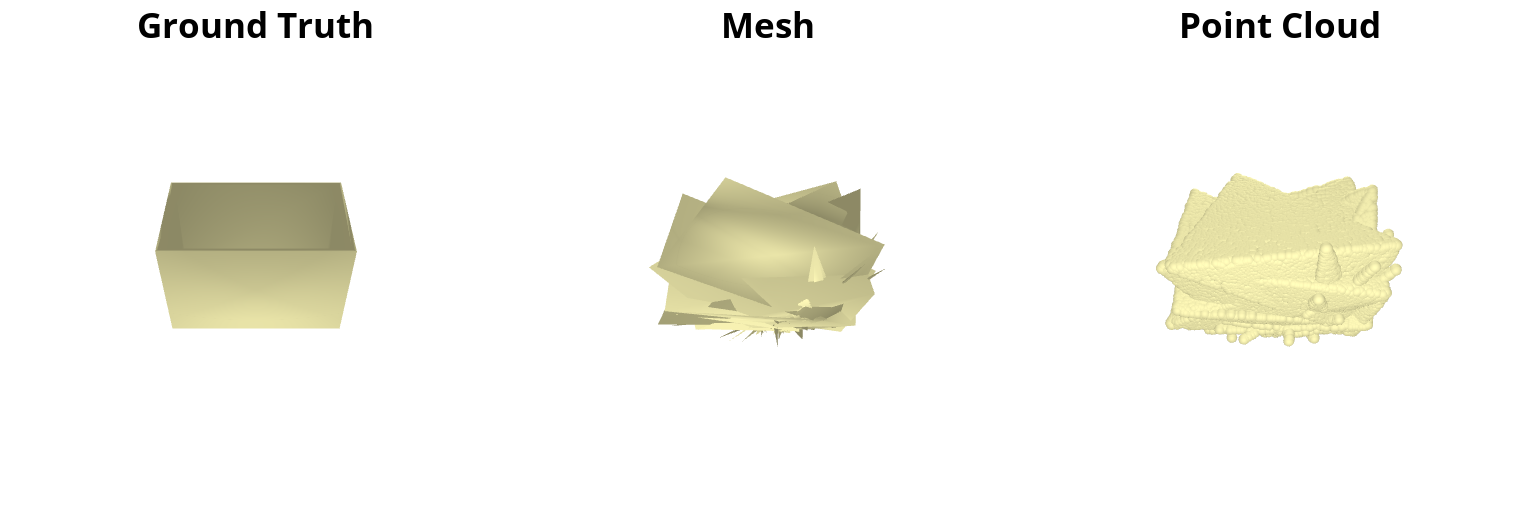

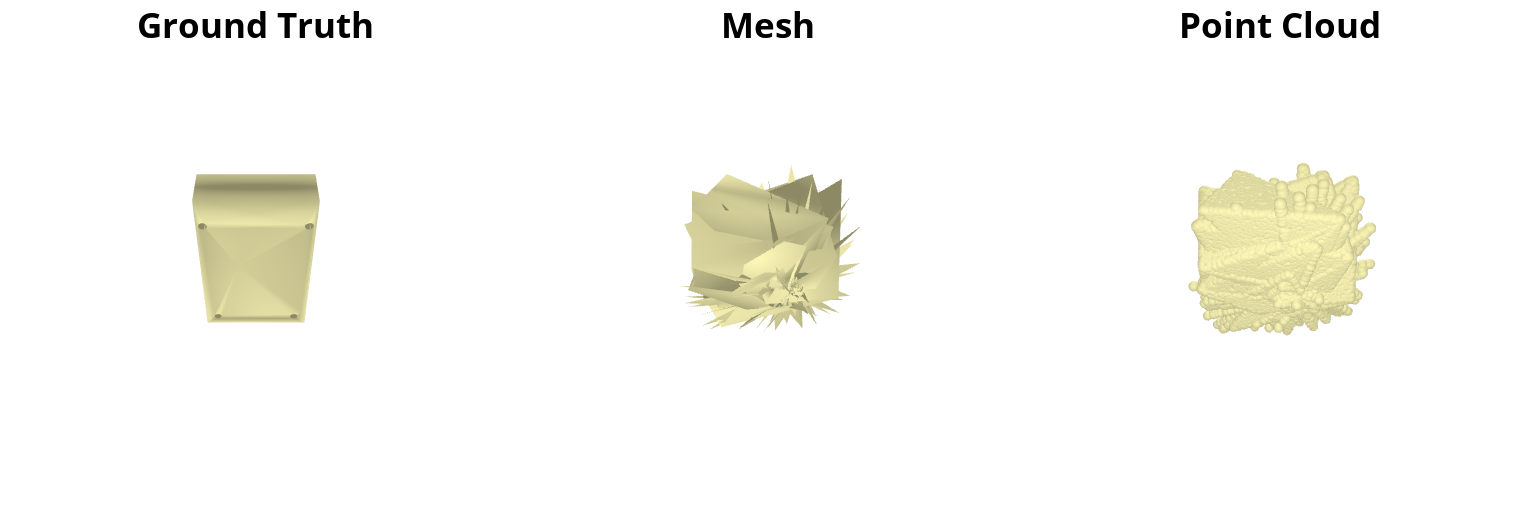

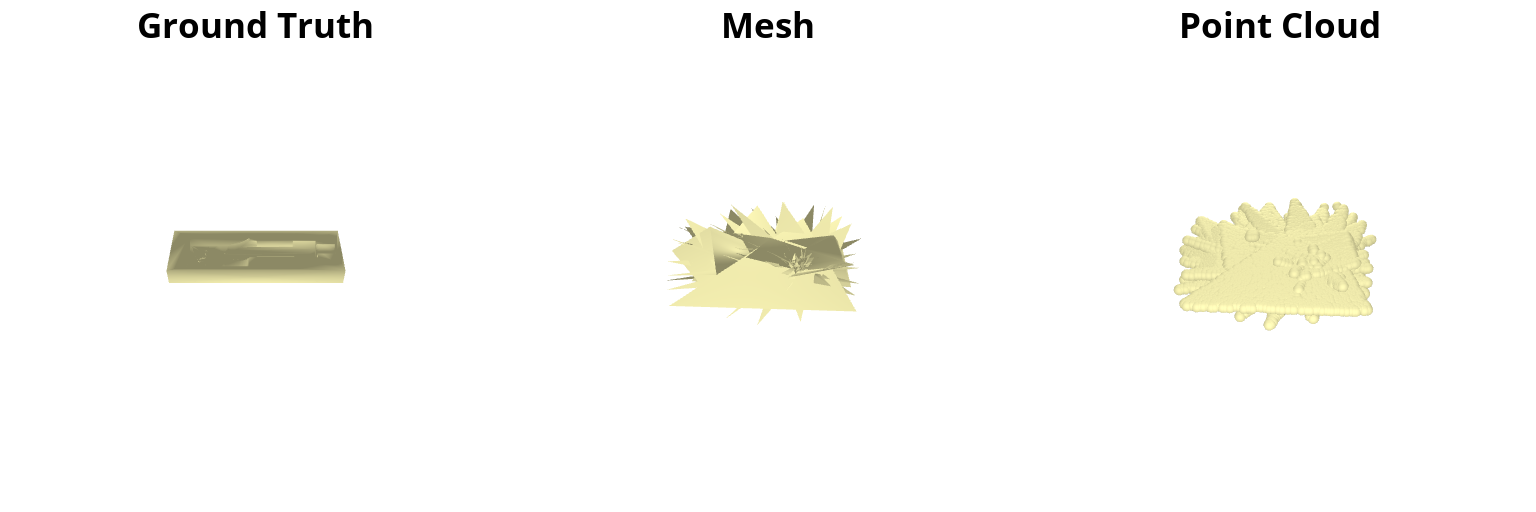

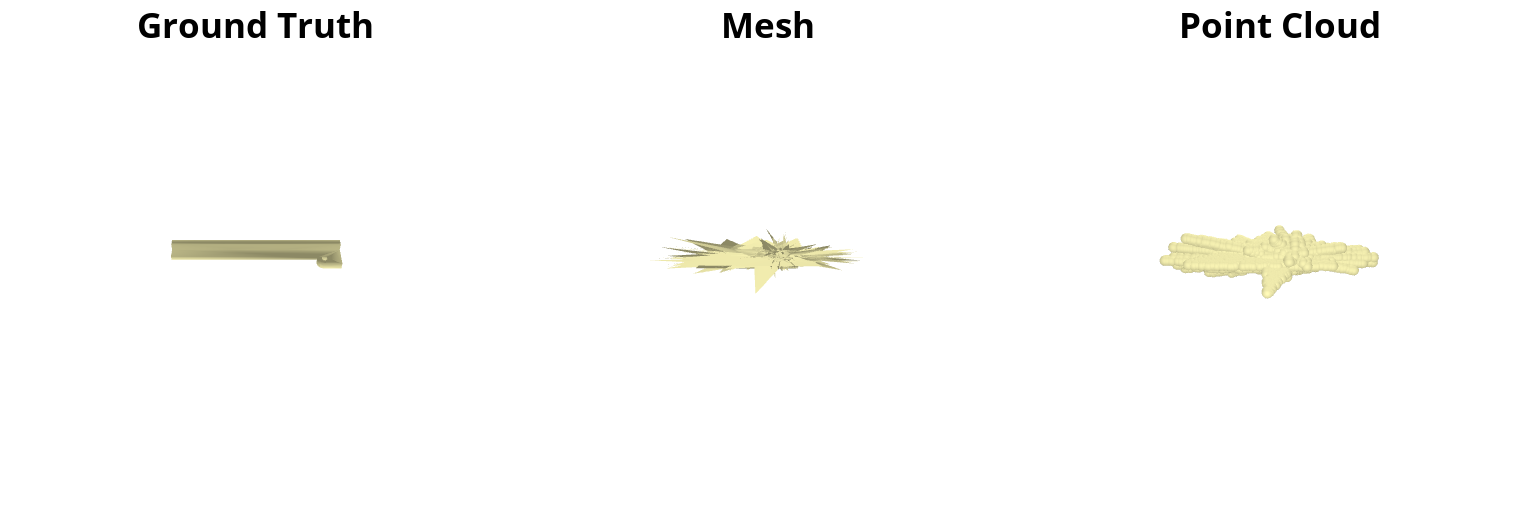

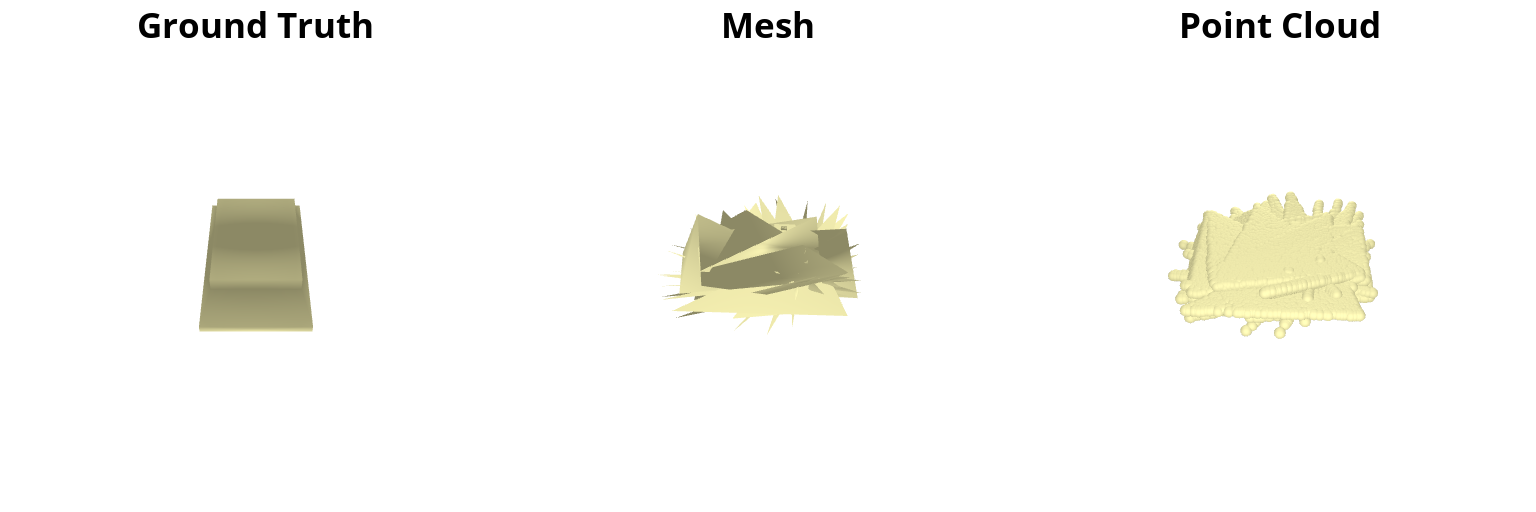

In [2]:
import os
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from glob import glob 

from pterotactyl import objects
FONT_LOCATION = os.path.dirname(objects.__file__) + '/OpenSans-Bold.ttf'


params.eval = True 
params.visualize = True
tester = train.Engine(params)
tester()


histogram = Image.open('results/NN_example/histogram.png')
display(histogram)
print('\n\n')
actions = Image.open('results/NN_example/sphere_projection.png')
print('   Projected Actions')
display(actions)



img_locations = glob('results/NN_example/*/')
for location in img_locations[:5]:
    mesh = Image.open(location + "mesh.png")
    points = Image.open(location + "points.png")
    gt = Image.open(location + "ground_truth.png")
    
    
    combo = Image.new('RGB', (512*3, 512))
    x_offset = 0
    
    for im, st in [[gt, 'Ground Truth'], [mesh, 'Mesh'], [points, 'Point Cloud']]:
        
        draw = ImageDraw.Draw(im)
        font = ImageFont.truetype(FONT_LOCATION, 35)
        W,H = im.size
        w,h = font.getsize(st)
        draw.text(((W-w)/2, 0),st,(0, 0, 0), font = font)
        combo.paste(im, (x_offset, 0))
        x_offset += im.size[0]
        
    display(combo)

<h2> NN - Pretrained </h2>

We now evaluate the pretrained model:

100%|████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 20582.01it/s]


The number of test set objects found : 13
argv[0]=
argv[0]=


 17%|█████████████▊                                                                     | 1/6 [00:01<00:07,  1.55s/it]

Valid || score: 0.2789, reward = 0.7211


 33%|███████████████████████████▋                                                       | 2/6 [00:02<00:05,  1.40s/it]

Valid || score: 0.1897, reward = 0.8103


 50%|█████████████████████████████████████████▌                                         | 3/6 [00:04<00:04,  1.36s/it]

Valid || score: 0.2378, reward = 0.7622


 67%|███████████████████████████████████████████████████████▎                           | 4/6 [00:05<00:02,  1.34s/it]

Valid || score: 0.3470, reward = 0.6530


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [00:06<00:01,  1.33s/it]

Valid || score: 0.2567, reward = 0.7433


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [00:08<00:01,  1.33s/it]

Valid || score: 0.2067, reward = 0.7933
*******************************
rendering the predicted objects
*******************************


  0%|          | 0/12 [00:00<?, ?it/s]

argv[0]=
argv[0]=


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:11<00:00,  1.89s/it]

******************************
*********************************************
Total Valid || score: 0.2528, reward = 0.7472
*********************************************


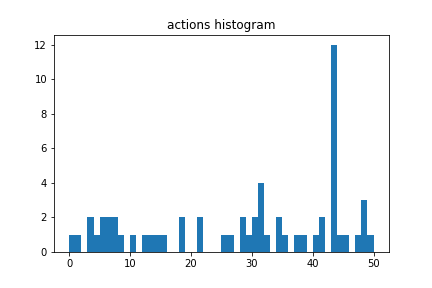




   Projected Actions


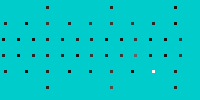

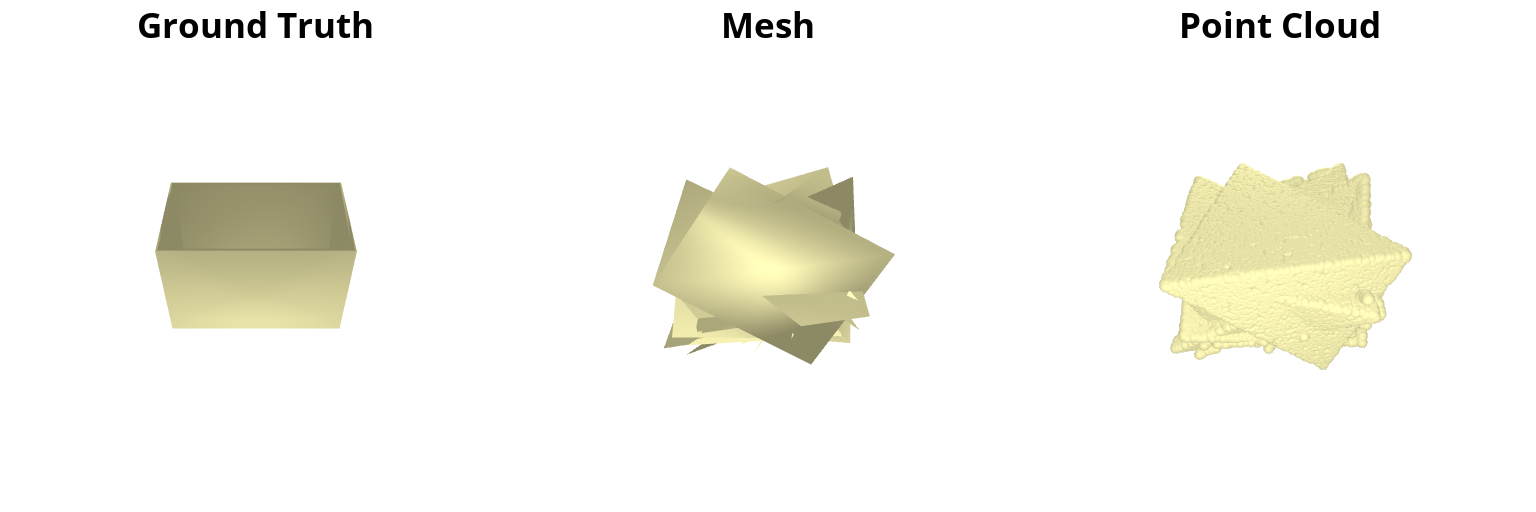

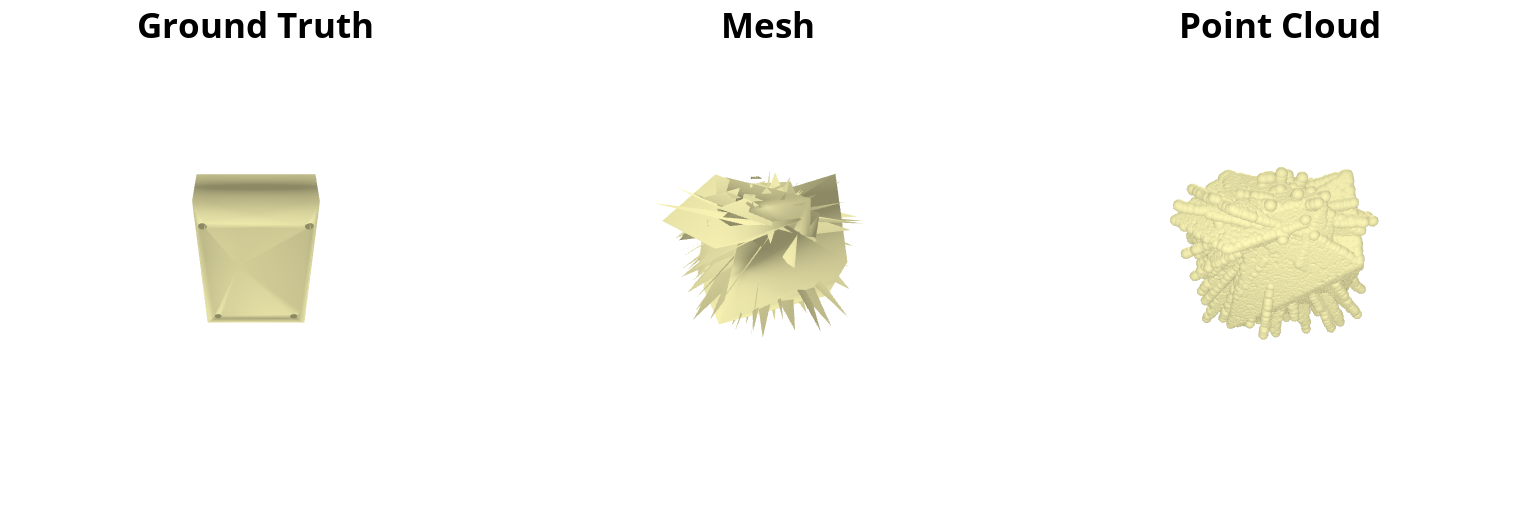

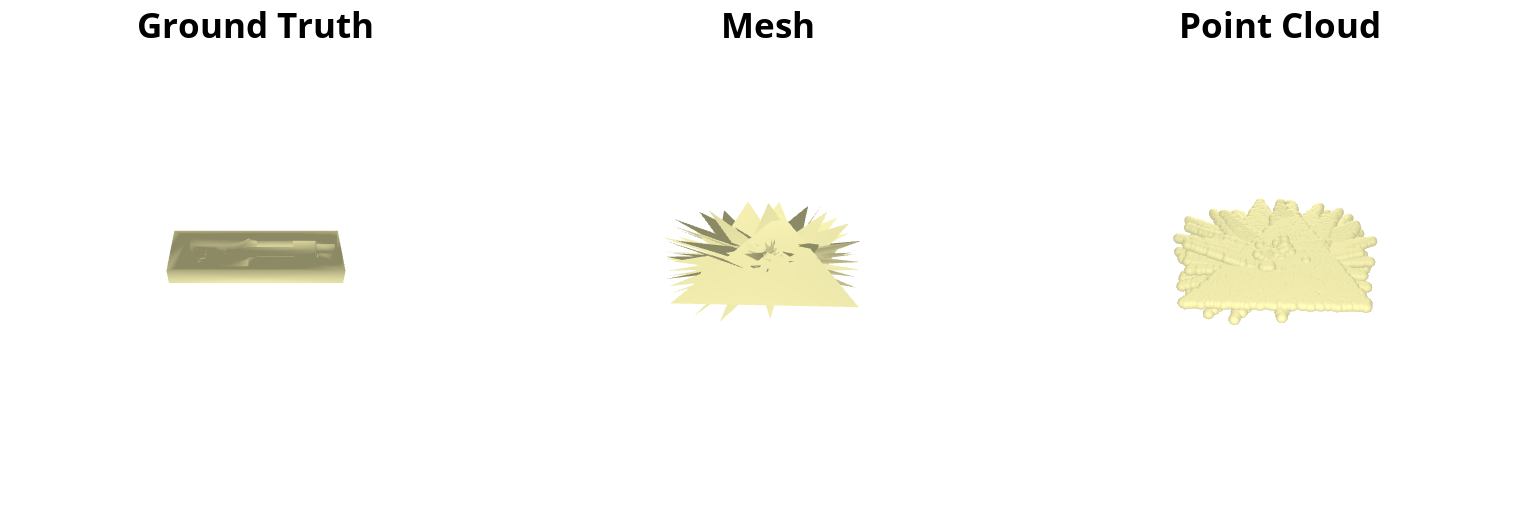

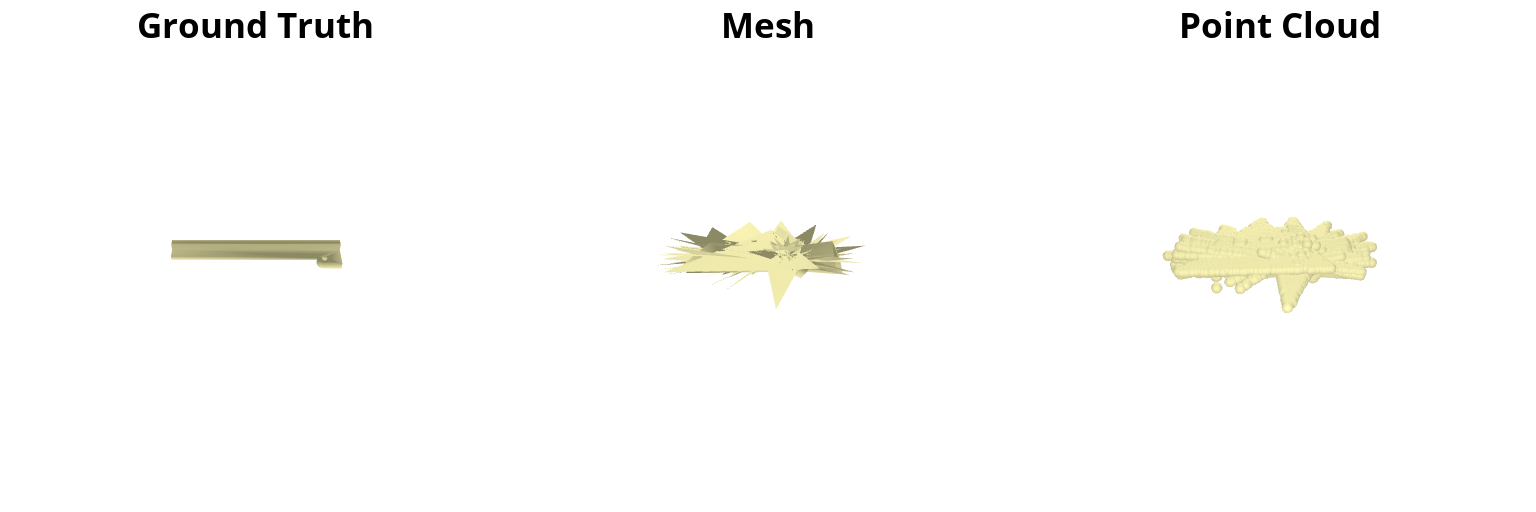

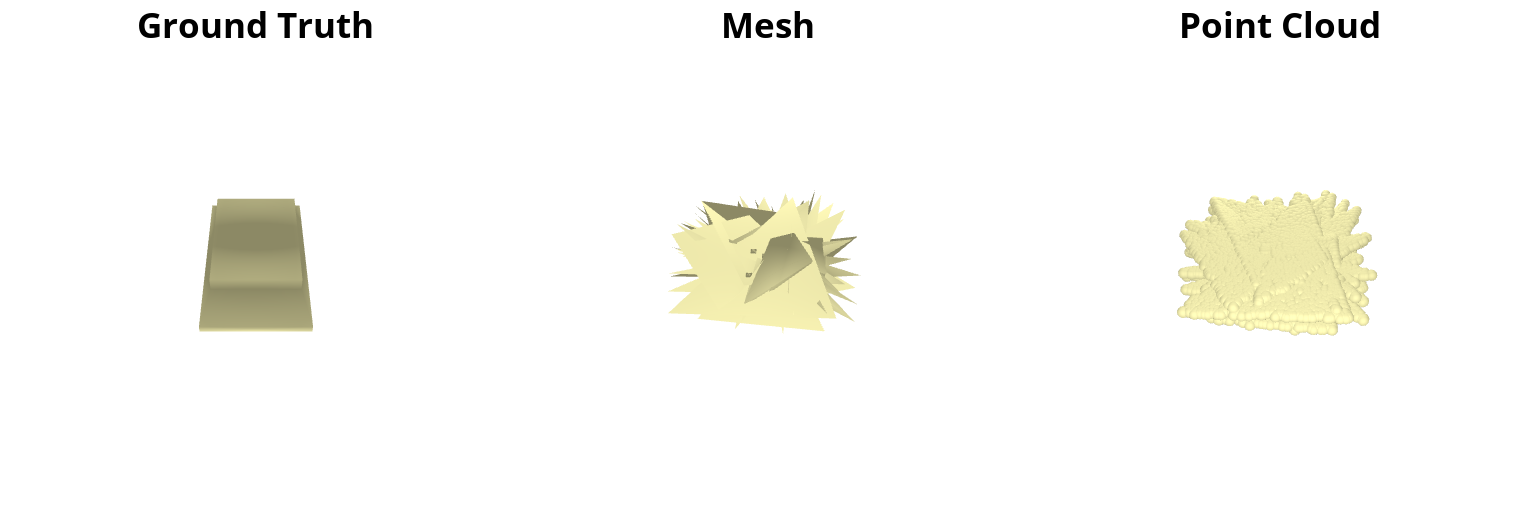

In [3]:
import os

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from glob import glob 

from pterotactyl import objects
from pterotactyl.policies.NearestNeighbor import train

FONT_LOCATION = os.path.dirname(objects.__file__) + '/OpenSans-Bold.ttf'



class Params: # define training arguments 
    def __init__(self):
        self.limit_data = True
        self.env_batch_size = 2
        self.num_actions = 50
        self.seed = 0 
        self.budget = 5
        self.number_points = 10000
        self.loss_coeff = 9000
        self.exp_type = "NN_pre"
        self.finger = True 
        self.num_grasps = 5 
        self.use_touch = True 
        self.use_img = False
        self.visualize = True
        self.use_latent = True
        self.use_recon = False 
        self.eval = True 
        self.greedy_checks = 3
        self.pretrained_recon = True
        self.pretrained=True
        self.visualize = True
        
    

params = Params()
eval = train.Engine(params)
eval()


histogram = Image.open('results/NN_pre/histogram.png')
display(histogram)
print('\n\n')
actions = Image.open('results/NN_pre/sphere_projection.png')
print('   Projected Actions')
display(actions)



img_locations = glob('results/NN_pre/*/')
for location in img_locations[:5]:
    mesh = Image.open(location + "mesh.png")
    points = Image.open(location + "points.png")
    gt = Image.open(location + "ground_truth.png")
    
    
    combo = Image.new('RGB', (512*3, 512))
    x_offset = 0
    
    for im, st in [[gt, 'Ground Truth'], [mesh, 'Mesh'], [points, 'Point Cloud']]:
        
        draw = ImageDraw.Draw(im)
        font = ImageFont.truetype(FONT_LOCATION, 35)
        W,H = im.size
        w,h = font.getsize(st)
        draw.text(((W-w)/2, 0),st,(0, 0, 0), font = font)
        combo.paste(im, (x_offset, 0))
        x_offset += im.size[0]
        
    display(combo)






